![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)
# Benchmark for KIT and mutants


### Background
**KIT** (Proto-oncogene c-KIT) receptor plays a crucial role in regulating cell growth, differentiation, and survival. It's particularly important in the development of blood cells, melanocytes (the cells that produce melanin, the pigment responsible for skin, hair, and eye color), and certain cells in the gut. Mutations in the KIT gene can lead to uncontrolled cell growth and contribute to the development of certain types of cancer, including gastrointestinal stromal tumors (GISTs) and some types of leukemia

### Benchmarking

- **KIT wild type**:  In certain cancers, KIT signaling can be activated by other receptors or mutations upstream in the signaling pathway. Targeting these upstream factors can indirectly impact KIT signaling and downstream effects. An example of this is seen in some cases of acute myeloid leukemia (AML) where KIT is expressed without mutations, but other upstream mutations can lead to aberrant KIT activation.
- **KIT selectivity**: This dataset includes KIT wild type and reported mutants `KIT T6701`, `KIT V560G`. D816V results in constitutive phosphorylation of Kit, activation of Stat5 signaling (PMID: 19865100, PMID: 18390729), induces mastocytosis and tumor formation in mice (PMID: 21148330) and confers resistance to Kit inhibitors (PMID: 22301675, PMID: 19164557). 

The goal of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.


## Description of readout:
- **Readouts**: `KIT`, `KIT_(T670I_mutant)`, `KIT_(V560G_mutant)`
- **Bioassay readout**: percentage of inhibition.
- **Optimization objective**: Higher inhibition


### Data resource: 
- **Reference**: [PKIS1](https://pubmed.ncbi.nlm.nih.gov/26501955)

### Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
import pandas as pd
import datamol as dm
import numpy as np
from sklearn.model_selection import ShuffleSplit
import polaris
from polaris.curation._chemistry_curator import SMILES_COL, UNIQUE_ID
from polaris.dataset import Dataset, ColumnAnnotation
from polaris.benchmark import SingleTaskBenchmarkSpecification, MultiTaskBenchmarkSpecification
import warnings
warnings.filterwarnings("ignore")
import os
import pathlib
os.chdir(pathlib.Path("__file__").absolute().parents[2])
from utils import *

In [2]:
BENCHMARK_DIR = "gs://polaris-public/benchmarks/kinases/kit"
FIGURE_DIR = "gs://polaris-public/datasets/kinases/kit/figures"

## Load existing dataset object
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details in [here](https://github.com/polaris-hub/polaris-recipes/blob/mvp/03_Kinases/LOK_SLK).


In [3]:
dataset = polaris.load_dataset("gs://polaris-public/datasets/kinases/pkis1_subset_curated /pkis1_egfr_ret_kit_lok_slk_v1/dataset.json")

In [4]:
# Display dataset
dataset

{
  "name": "pkis1_egfr_ret_kit_lok_slk_v1",
  "description": "A subset of PKIS dataset only including EGFR, RET, KIT, LOK and SLK kinases. PKIS is a data set of 367 small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.",
  "tags": [
    "Kinase",
    "HitDiscovery",
    "Selectivity"
  ],
  "user_attributes": {},
  "owner": {
    "slug": "polaristest",
    "organization_id": "PolarisTest",
    "user_id": null,
    "owner": "PolarisTest"
  },
  "md5sum": "d06197a01ac7f285c417abdd12b9d2f8",
  "readme": "",
  "annotations": {
    "UNIQUE_ID": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {}
    },
    "smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": null,
      "user_attributes": {}
    },
    "EGFR_(L858R_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "EGFR_(L861Q_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "EGFR_(T790M_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "EGFR_(T790M-L858R_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      }
    },
    "KIT_(D816V_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "KIT"
      }
    },
    "KIT_(T6701_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "KIT"
      }
    },
    "KIT_(V560G_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "KIT"
      }
    },
    "KIT": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": null,
      "user_attributes": {
        "unit": "%",
    

In [5]:
# data columns
data_cols = ['KIT_(T6701_mutant)', 'KIT_(V560G_mutant)', 'KIT']

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-validation-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [6]:
from polaris.utils.types import HubOwner
owner = HubOwner(organizationId="PolarisTest", slug="polaristest")
owner.owner

'PolarisTest'

### Create scaffold split for `KIT & mutants` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [7]:
# scaffold split
from partitio._scaffold_split import ScaffoldSplit
flag = True
TEST_SIZE = 0.2
SEED = 780
splitter = ScaffoldSplit(smiles=dataset.table.smiles.values, n_jobs=-1, test_size=TEST_SIZE, random_state=SEED)
scaffold_split = next(splitter.split(X=dataset.table.smiles.values))

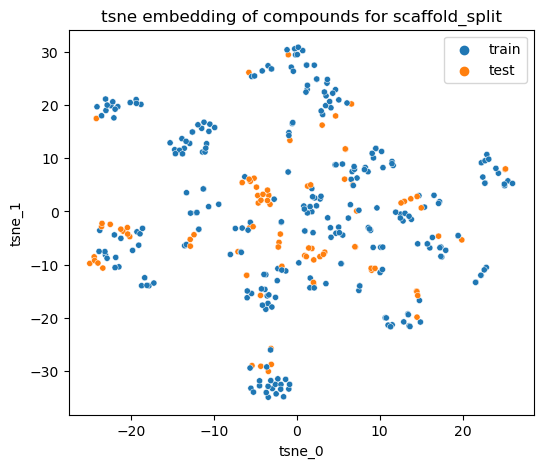

In [8]:
from utils import display_chemspace
data_name = "drewry_kit_wt_t670i_v560g_v1"
fig = display_chemspace(dataset.table.copy(), 'smiles', split =scaffold_split, 
                   split_name="scaffold_split")
method = "tnse"
save_figure(fig,remote_path=f"{FIGURE_DIR}/{data_name}_{method}_scaffold_split.png", 
            local_path=f"figures/{data_name}_{method}_scaffold_split.png" )

## Single task for KIT and mutants with scaffold split 

**Regression tasks**

In [9]:
benchmark_name =f"drewry_kit_wt_t670i_v560g_multitask_reg_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ['KIT_(T6701_mutant)', 'KIT_(V560G_mutant)', 'KIT']
benchmark_reg = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=["mean_absolute_error",
            "mean_squared_error",
            "r2",
            "spearmanr",
            "pearsonr",
            "explained_var"], 
    tags=["Kinase","SingleTask", "Regression", "HitDiscovery"],
    description="Singletask regression benchmark for RET wild type.", 
    owner=owner, 
    readme=load_readme(f"gs://polaris-public/readme/benchmarks/{benchmark_name}_readme.md")

)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/kit/drewry_kit_wt_t670i_v560g_multitask_reg_v1/benchmark.json


**Classification tasks**

In [10]:
data_cols = ['CLASS_KIT_(T6701_mutant)', 'CLASS_KIT_(V560G_mutant)', 'CLASS_KIT']
benchmark_name =f"drewry_kit_wt_t670i_v560g_multitask_clf_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_clf = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="f1_macro",
    metrics=["accuracy", "f1","f1_macro", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["Kinase", "SingleTask", "Classification", "HitDiscovery"],
    description="Single task classification benchmark for REY wild type.",
    owner=owner, 
    readme=load_readme(f"gs://polaris-public/readme/benchmarks/{benchmark_name}_readme.md")

)
path = benchmark_clf.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/kit/drewry_kit_wt_t670i_v560g_multitask_clf_v1/benchmark.json
